In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
uploaded = files.upload()

Saving JNPT_2019.csv to JNPT_2019.csv


In [3]:
df=pd.read_csv(io.BytesIO(uploaded['JNPT_2019.csv']))
df.head() #displays first 5 elements

,Station,Date,Radar Sensor,Pressure Sensor,Shaft Encoder Sensor
0,JNPT,01-01-2019 00:00,343.99,327.27,340.46
1,JNPT,01-01-2019 00:01,343.09,326.42,339.77
2,JNPT,01-01-2019 00:02,347.07,330.59,343.04
3,JNPT,01-01-2019 00:03,346.46,329.76,342.50
4,JNPT,01-01-2019 00:04,345.56,328.97,341.92


In [4]:
r_s=df['Radar Sensor']
p_s=df['Pressure Sensor']
s_e_s=df['Shaft Encoder Sensor']

In [30]:
#for 3 months--118907
date=df.iloc[:118908,1].values
date

array(['01-01-2019 00:00', '01-01-2019 00:01', '01-01-2019 00:02', ...,
       '31-03-2019 14:41', '31-03-2019 14:42', '31-03-2019 14:43'],
      dtype=object)

In [84]:
date1=df.iloc[:118908,2]

In [37]:
X_train=r_s[0:118907]
Y_train=r_s[1:118908]
X_train

0          343.99
1          343.09
2          347.07
3          346.46
4          345.56
           ...   
118902    9999.99
118903    9999.99
118904    9999.99
118905    9999.99
118906    9999.99
Name: Radar Sensor, Length: 118907, dtype: float64

In [39]:
X_train=np.reshape(np.array(X_train),(118907,1,1))
Y_train=np.reshape(np.array(Y_train),(118908,1,1))

ValueError: ignored

In [33]:
from keras.layers import Dense,LSTM
from keras.models import Sequential

In [34]:
#IMPORTING LSTM
#EPOCHS=500

In [41]:
reg=Sequential()
reg.add(LSTM(units=4,activation='relu',input_shape=(None,1)))
reg.add(Dense(units=1))
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,Y_train,batch_size=10,epochs=500)

Epoch 1/500
11891/11891 [==============================] - 46s 4ms/step - loss: 490188.0416
Epoch 2/500
11891/11891 [==============================] - 45s 4ms/step - loss: 522423.8185
Epoch 3/500
11891/11891 [==============================] - 45s 4ms/step - loss: 500909.0229
Epoch 4/500
11891/11891 [==============================] - 45s 4ms/step - loss: 516828.3528
Epoch 5/500
11891/11891 [==============================] - 45s 4ms/step - loss: 471428.5929
Epoch 6/500
11891/11891 [==============================] - 45s 4ms/step - loss: 487134.3359
Epoch 7/500
11891/11891 [==============================] - 45s 4ms/step - loss: 550036.9463
Epoch 8/500
11891/11891 [==============================] - 45s 4ms/step - loss: 434233.2238
Epoch 9/500
11891/11891 [==============================] - 46s 4ms/step - loss: 498074.7158
Epoch 10/500
11891/11891 [==============================] - 46s 4ms/step - loss: 451386.2775
Epoch 11/500
11891/11891 [==============================] - 46s 4ms/step - loss

In [42]:
#testing with 4th month

In [78]:
uploaded1 = files.upload()
dg=pd.read_csv(io.BytesIO(uploaded['JNPT_2019.csv']))
#dg=dg.iloc[93265:127549,1:2].values
#dh=pd.read_csv(r'C:\Users\medik\Downloads\AerialBayENC_2019 (1).csv')


Saving JNPT_2019.csv to JNPT_2019 (2).csv


In [80]:
#test with 4 month
dg.iloc[118908:155065,2]

118908    9999.99
118909    9999.99
118910    9999.99
118911     395.13
118912     395.05
           ...   
155060     231.17
155061     230.75
155062     230.14
155063     232.42
155064     232.14
Name: Radar Sensor, Length: 36157, dtype: float64

In [81]:
dg1=dg.iloc[118908:155065,2].values
dg1=np.reshape(dg1,(36157,1,1))
dg1
#reg.predict(dg)

array([[[9999.99]],

       [[9999.99]],

       [[9999.99]],

       ...,

       [[ 230.14]],

       [[ 232.42]],

       [[ 232.14]]])

In [87]:
dg2=dg.iloc[118908:155065,2].values

In [82]:
reg.predict(dg1)

array([[7826.288  ],
       [7826.288  ],
       [7826.288  ],
       ...,
       [ 231.33917],
       [ 233.59937],
       [ 233.32178]], dtype=float32)

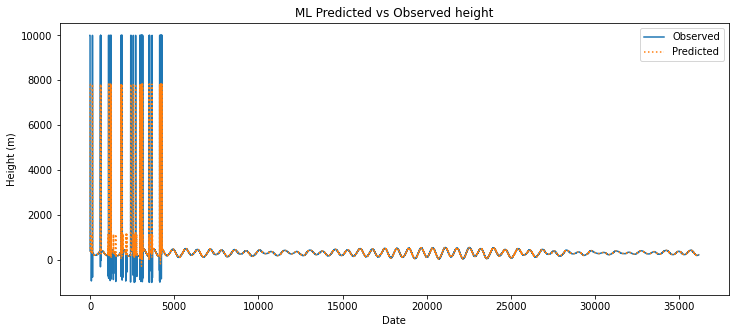

In [91]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(0,36157),dg2,label='Observed')
plt.plot(np.arange(0,36157),reg.predict(dg1),label='Predicted',linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Height (m)')
plt.title('ML Predicted vs Observed height')
plt.legend()

In [92]:
from sklearn.metrics import mean_squared_error
print('RMSE: ',np.sqrt(mean_squared_error(dg2,reg.predict(dg1))))

RMSE:  191.92538365869504
